In [1]:
%pip install mysql-connector-python tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mysql.connector

# Function to establish and return a new connection and cursor
def get_connection():
    config = {
        'user': 'root',  # Your MySQL username
        'password': 'Adithya@12',  # Your MySQL password
        'host': '127.0.0.1',  # Database host (localhost in this case)
        'port': '3306',  # Default MySQL port
        'database': 'mental_health_project'  # Your database name
    }

    connection = mysql.connector.connect(**config)
    cursor = connection.cursor()
    return connection, cursor

# Connect to the database
try:
    conn, cur = get_connection()
    if conn.is_connected():
        print("Successfully connected to the database")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    exit(1)


Successfully connected to the database


In [3]:
# Step 2: Fetch data from the database
cur = conn.cursor()

# Query to fetch the data where sentiment_score is NOT NULL (fetch all records)
query = """
SELECT user_id, social_media_posts, sentiment_score
FROM mental_health_data
"""
cur.execute(query)

# Fetch all rows from the query
rows = cur.fetchall()

# Check the number of rows fetched
print(f"Number of rows fetched: {len(rows)}")

# Check if any data was fetched
if not rows:
    print("No data found for tokenization.")
else:
    print(f"Fetched {len(rows)} records for processing.")

    # Process each row
    for row in rows:
        user_id = row[0]
        social_media_post = row[1]
        sentiment_score = row[2]  # Fetch the sentiment_score column

        # Check if the post is not None or empty
        if social_media_post:
            # Perform tokenization here (this part should be your tokenizer logic)
            print(f"Processing User ID: {user_id} - Sentiment Score: {sentiment_score} - Social Media Post: {social_media_post}")
        else:
            print(f"Skipping User ID: {user_id} - No valid post.")


Number of rows fetched: 27
Fetched 27 records for processing.
Processing User ID: 1 - Sentiment Score: 0.8 - Social Media Post: Feeling good today!
Processing User ID: 2 - Sentiment Score: 0.4 - Social Media Post: Had a stressful day.
Processing User ID: 3 - Sentiment Score: 0.9 - Social Media Post: Great workout session!
Processing User ID: 4 - Sentiment Score: 0.6 - Social Media Post: Busy day but managed to exercise.
Processing User ID: 5 - Sentiment Score: 0.2 - Social Media Post: Not a great day today.
Processing User ID: 6 - Sentiment Score: 0.95 - Social Media Post: Feeling fantastic!
Processing User ID: 7 - Sentiment Score: 0.15 - Social Media Post: Exhausted from work.
Processing User ID: 8 - Sentiment Score: 0.7 - Social Media Post: Productive day overall.
Processing User ID: 9 - Sentiment Score: 0.5 - Social Media Post: Struggling a bit.
Processing User ID: 10 - Sentiment Score: 0.85 - Social Media Post: Great day for outdoor activities.
Processing User ID: 11 - Sentiment Sc

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Step 3: Prepare the tokenizer
tokenizer = Tokenizer()

texts = [row[1] for row in rows]  # Extracting social media posts from rows
tokenizer.fit_on_texts(texts)

print(f"Tokenizer vocabulary size: {len(tokenizer.word_index)}")

Tokenizer vocabulary size: 49


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 4: Tokenize and update the database
max_sequence_length = 100  # Adjust as needed

for row in rows:
    user_id = row[0]
    social_media_post = row[1]

    if social_media_post and social_media_post.strip() != "":
        # Tokenize and pad the text
        sequence = tokenizer.texts_to_sequences([social_media_post])
        padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

        # Convert the padded sequence into a string format for storage
        padded_sequence_str = str(padded_sequence.tolist())

        # Update the database with the tokenized post
        update_query = """
        UPDATE mental_health_data
        SET tokenized_post = %s
        WHERE user_id = %s
        """
        try:
            cur.execute(update_query, (padded_sequence_str, user_id))
            print(f"Successfully updated User ID {user_id} with tokenized post.")
        except mysql.connector.Error as err:
            print(f"Error updating User ID {user_id}: {err}")
    else:
        print(f"Skipping User ID {user_id} due to empty or null post.")


Successfully updated User ID 1 with tokenized post.
Successfully updated User ID 2 with tokenized post.
Successfully updated User ID 3 with tokenized post.
Successfully updated User ID 4 with tokenized post.
Successfully updated User ID 5 with tokenized post.
Successfully updated User ID 6 with tokenized post.
Successfully updated User ID 7 with tokenized post.
Successfully updated User ID 8 with tokenized post.
Successfully updated User ID 9 with tokenized post.
Successfully updated User ID 10 with tokenized post.
Successfully updated User ID 11 with tokenized post.
Successfully updated User ID 12 with tokenized post.
Successfully updated User ID 13 with tokenized post.
Successfully updated User ID 14 with tokenized post.
Successfully updated User ID 15 with tokenized post.
Successfully updated User ID 16 with tokenized post.
Successfully updated User ID 17 with tokenized post.
Successfully updated User ID 18 with tokenized post.
Successfully updated User ID 19 with tokenized post.
Su

In [6]:
# Step 5: Commit changes to the database
try:
    conn.commit()
    print("Changes committed to the database.")
except mysql.connector.Error as err:
    print(f"Error committing to database: {err}")
    conn.rollback()  # Rollback in case of failure

Changes committed to the database.


In [7]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Fetched 27 records for plotting.


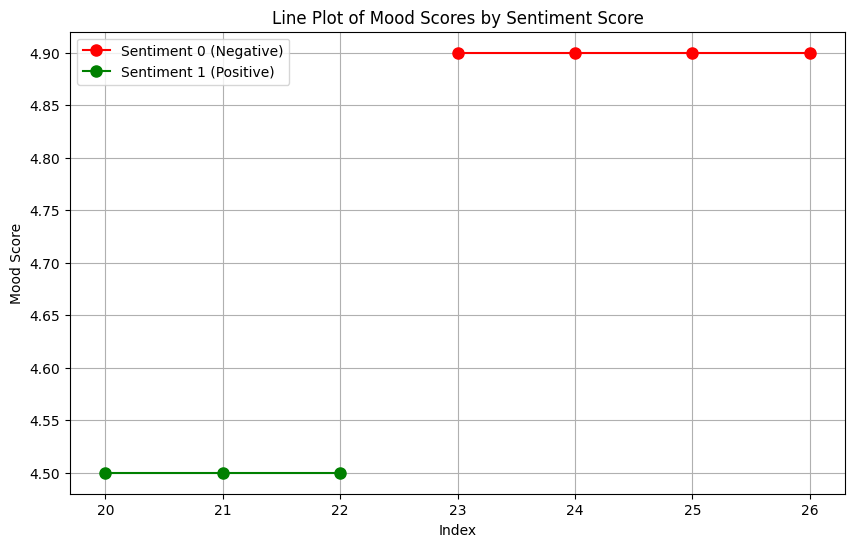

In [8]:
import mysql.connector
import matplotlib.pyplot as plt

# Function to establish and return a new connection and cursor
def get_connection():
    config = {
        'user': 'root',  # Your MySQL username
        'password': 'Adithya@12',  # Your MySQL password
        'host': '127.0.0.1',  # Database host (localhost in this case)
        'port': '3306',  # Default MySQL port
        'database': 'mental_health_project'  # Your database name
    }

    connection = mysql.connector.connect(**config)
    cursor = connection.cursor()
    return connection, cursor

# Step 1: Connect to the database
conn, cur = get_connection()

# Step 2: Fetch sentiment_score and mood_score from the database
query = """
SELECT sentiment_score, mood_score 
FROM mental_health_data 
WHERE sentiment_score IS NOT NULL
"""
cur.execute(query)

# Fetch all rows from the query
rows = cur.fetchall()

# Check if any data was fetched
if not rows:
    print("No data found for sentiment and mood scores.")
else:
    print(f"Fetched {len(rows)} records for plotting.")
    
    # Extract sentiment scores and mood scores into separate lists
    sentiment_score = [row[0] for row in rows]
    mood_score = [row[1] for row in rows]

    # Step 3: Visualize sentiment vs mood score using a line plot
    plt.figure(figsize=(10, 6))

    # Line plot for sentiment score 0
    plt.plot([i for i in range(len(sentiment_score)) if sentiment_score[i] == 0],
             [mood_score[i] for i in range(len(sentiment_score)) if sentiment_score[i] == 0],
             label='Sentiment 0 (Negative)', color='red', marker='o', linestyle='-', markersize=8)

    # Line plot for sentiment score 1
    plt.plot([i for i in range(len(sentiment_score)) if sentiment_score[i] == 1],
             [mood_score[i] for i in range(len(sentiment_score)) if sentiment_score[i] == 1],
             label='Sentiment 1 (Positive)', color='green', marker='o', linestyle='-', markersize=8)

    # Adding titles and labels
    plt.title("Line Plot of Mood Scores by Sentiment Score")
    plt.xlabel("Index")
    plt.ylabel("Mood Score")

    # Adding a legend
    plt.legend()

    # Display grid and plot
    plt.grid(True)
    plt.show()

# Step 4: Clean up by closing the cursor and connection
cur.close()
conn.close()


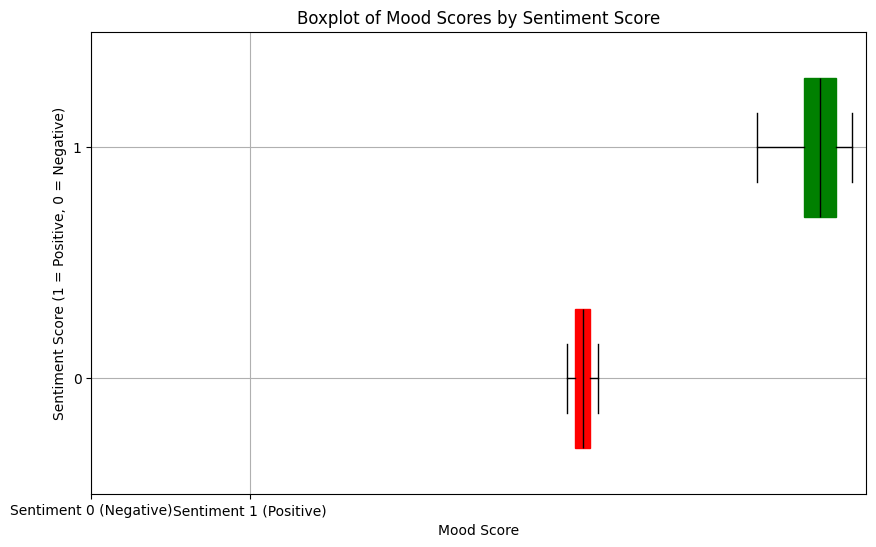

In [9]:
import matplotlib.pyplot as plt

# Example data for visualization
sentiment_score = [1, 0, 1, 1, 0, 1, 0, 1]  # Sentiment analysis output
mood_score = [4.5, 3.2, 4.7, 4.8, 3.1, 4.2, 3.0, 4.6]  # Example mood scores

# Visualizing sentiment vs mood score with a boxplot
plt.figure(figsize=(10, 6))

# Creating boxplot for mood score based on sentiment score (grouped by sentiment)
plt.boxplot([mood_score[i] for i in range(len(sentiment_score)) if sentiment_score[i] == 0],
            positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red', color='red'),
            medianprops=dict(color='black'), vert=False)
plt.boxplot([mood_score[i] for i in range(len(sentiment_score)) if sentiment_score[i] == 1],
            positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='green'),
            medianprops=dict(color='black'), vert=False)

# Adding titles and labels
plt.title("Boxplot of Mood Scores by Sentiment Score")
plt.xlabel("Mood Score")
plt.ylabel("Sentiment Score (1 = Positive, 0 = Negative)")

# Customizing ticks
plt.xticks([0, 1], ['Sentiment 0 (Negative)', 'Sentiment 1 (Positive)'])

# Display grid and plot
plt.grid(True)
plt.show()
